In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline


In [2]:
data=pd.read_csv('C:/Users/Taha/Downloads/Fish.csv')
data.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [3]:
data.shape

(159, 7)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


# No missing values

In [5]:
data.isnull().any()

Species    False
Weight     False
Length1    False
Length2    False
Length3    False
Height     False
Width      False
dtype: bool

# Rename sime columns

In [6]:
data.rename(columns={'Length1' : 'VerLength' , 'Length2' :'DiagLength' , 'Length3' :'CroLength'} , inplace = True)
data.head()

,Species,Weight,VerLength,DiagLength,CroLength,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [7]:
data.describe()

,Weight,VerLength,DiagLength,CroLength,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


 # Show the number of each kind in dataFrame

In [8]:
species=data['Species'].value_counts()
species=pd.DataFrame(species)
species.T

,Perch,Bream,Roach,Pike,Smelt,Parkki,Whitefish
Species,56,35,20,17,14,11,6


# countplot Species
# Perch is the most type appear
# White fish is the least type appear

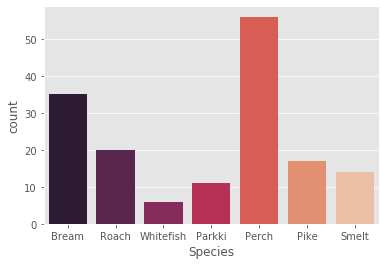

In [9]:
sns.countplot(x='Species' , data=data , palette = 'rocket')

# Percent of every type 

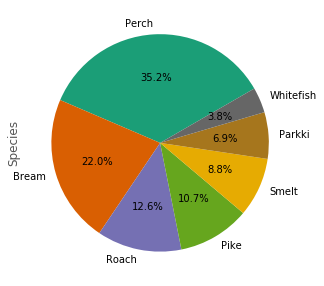

In [10]:
plt.figure(figsize=(5,5))
data['Species'].value_counts().plot.pie(autopct='%1.1f%%' , cmap='Dark2' , startangle=30 )

# piarplot for all features


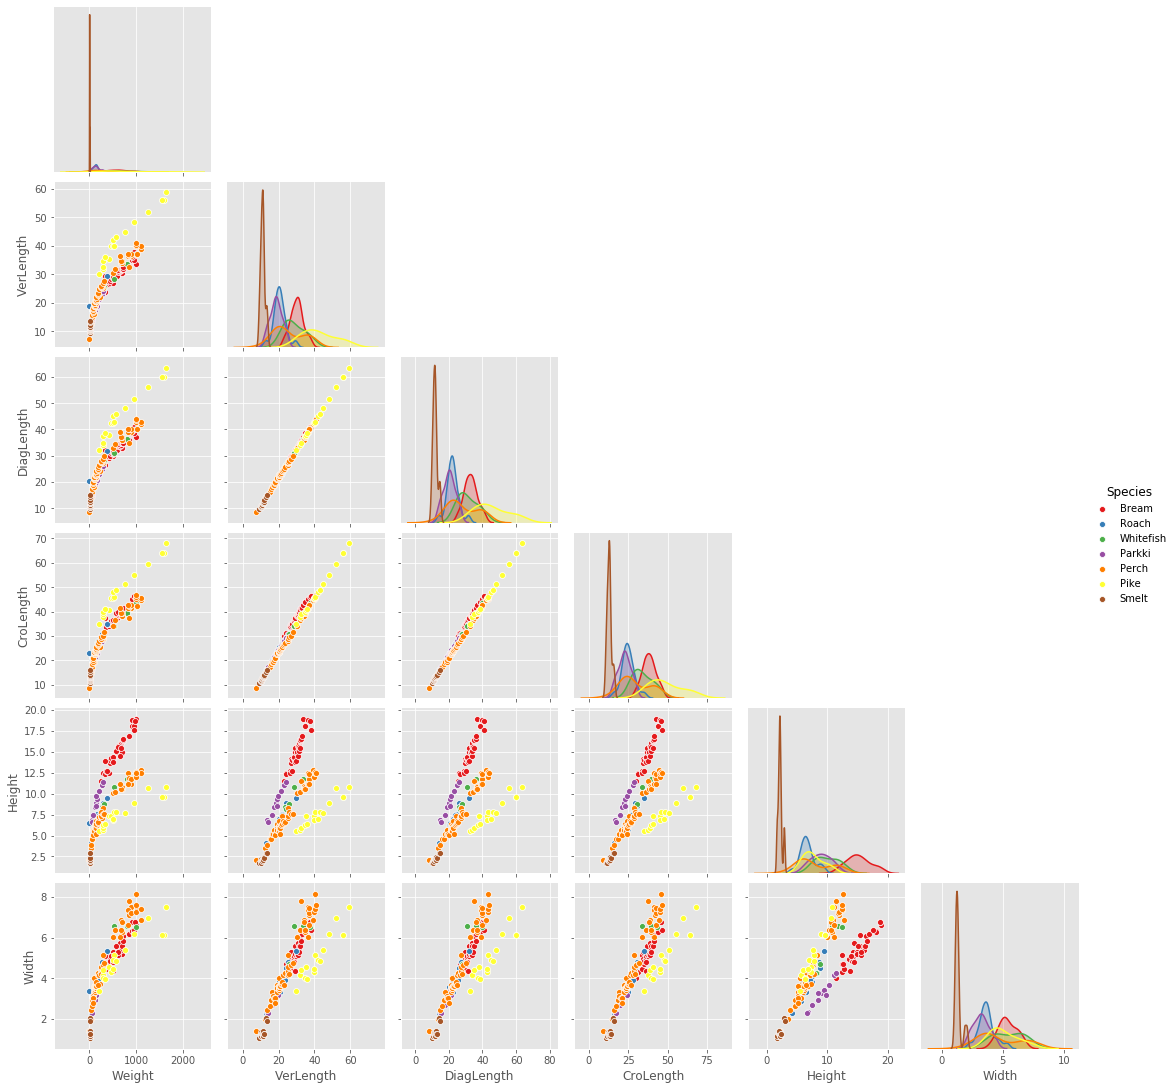

In [11]:
sns.pairplot(data , hue='Species' , palette='Set1' , corner = True)


# Outliers

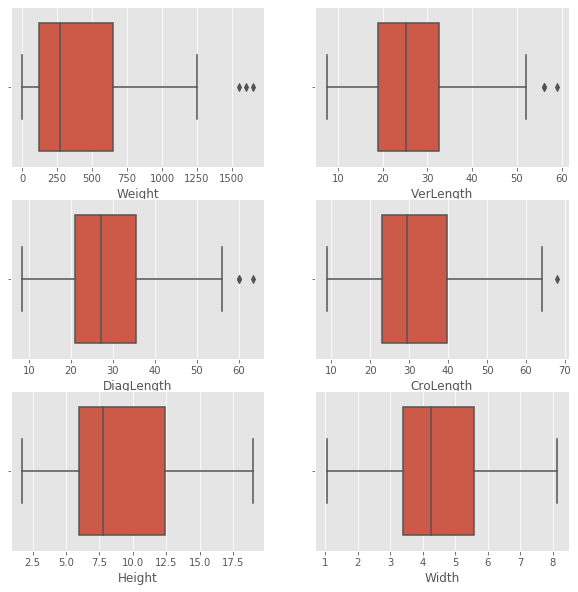

In [12]:
fig , AX =plt.subplots(3,2 , figsize=(10,10))
sns.boxplot(data['Weight'] , ax=AX[0][0])
sns.boxplot(data['VerLength'] , ax=AX[0][1])
sns.boxplot(data['DiagLength'] , ax=AX[1][0])
sns.boxplot(data['CroLength'] , ax=AX[1][1])
sns.boxplot(data['Height'] , ax=AX[2][0])
sns.boxplot(data['Width'] , ax=AX[2][1])

# Another easy way

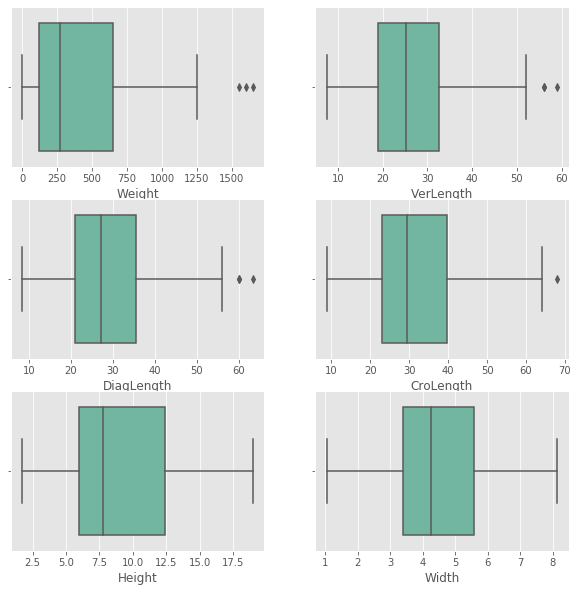

In [13]:
plt.figure(figsize=(10,10))
for i in np.arange(1,7):
    plt.subplot(3,2,i ) #title=data.columns[i]
    sns.boxplot(data[data.columns[i]] , palette='Set2')

# Dealing with Outliers

In [14]:
weight =data['Weight']
weightQ1 =weight.quantile(0.25)
weightQ3 =weight.quantile(0.75)
weightIQR = weightQ3-weightQ1
weightLowerEnd=weightQ1-(1.5*weightIQR)
weightUpperEnd=weightQ3+(1.5*weightIQR)


In [15]:
weightOutliers=weight[(weight<weightLowerEnd) | (weight>weightUpperEnd)]
weightOutliers

142    1600.0
143    1550.0
144    1650.0
Name: Weight, dtype: float64

In [16]:
verticalLength =data['VerLength']
verticalLengthQ1 =verticalLength.quantile(0.25)
verticalLengthQ3 =verticalLength.quantile(0.75)
verticalLengthIQR = verticalLengthQ3-verticalLengthQ1
verticalLengthLowerEnd=verticalLengthQ1-(1.5*verticalLengthIQR)
verticalLengthUpperEnd=verticalLengthQ3+(1.5*verticalLengthIQR)


In [17]:
verticalLengthOutliers=verticalLength[(verticalLength<verticalLengthLowerEnd) | (verticalLength>verticalLengthUpperEnd)]
verticalLengthOutliers

142    56.0
143    56.0
144    59.0
Name: VerLength, dtype: float64

In [18]:
diagonalLength =data['DiagLength']
diagonalLengthQ1 =diagonalLength.quantile(0.25)
diagonalLengthQ3 =diagonalLength.quantile(0.75)
diagonalLengthIQR = diagonalLengthQ3-diagonalLengthQ1
diagonalLengthLowerEnd=diagonalLengthQ1-(1.5*diagonalLengthIQR)
diagonalLengthUpperEnd=diagonalLengthQ3+(1.5*diagonalLengthIQR)

In [19]:
diagonalLengthOutliers=diagonalLength[(diagonalLength<diagonalLengthLowerEnd) | (diagonalLength>diagonalLengthUpperEnd)]
diagonalLengthOutliers

142    60.0
143    60.0
144    63.4
Name: DiagLength, dtype: float64

In [20]:
crossLength =data['CroLength']
crossLengthQ1 =crossLength.quantile(0.25)
crossLengthQ3 =crossLength.quantile(0.75)
crossLengthIQR = crossLengthQ3-crossLengthQ1
crossLengthLowerEnd=crossLengthQ1-(1.5*crossLengthIQR)
crossLengthUpperEnd=crossLengthQ3+(1.5*crossLengthIQR)

In [21]:
crossLengthOutliers=crossLength[(crossLength<crossLengthLowerEnd) | (crossLength>crossLengthUpperEnd)]
crossLengthOutliers

144    68.0
Name: CroLength, dtype: float64

# drop outliers

In [22]:
data=data.drop([142,143,144])


In [23]:
data.describe()

,Weight,VerLength,DiagLength,CroLength,Height,Width
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,375.217308,25.655769,27.786538,30.571154,8.951128,4.375719
std,319.546978,9.119630,9.792651,10.695359,4.324325,1.672188
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.000000,21.000000,23.025000,5.931675,3.369600
50%,271.000000,25.000000,26.750000,29.250000,7.647800,4.243300
75%,612.500000,32.125000,35.000000,39.425000,12.378550,5.424375
max,1250.000000,52.000000,56.000000,59.700000,18.957000,8.142000


# Smelt is the least weighty fish

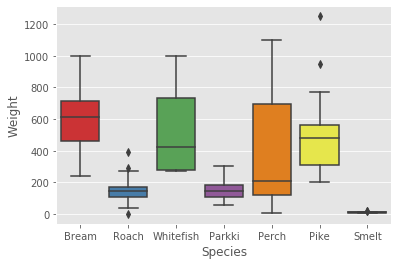

In [24]:
sns.boxplot(x=data['Species'] ,y=data['Weight'] ,palette='Set1' )

In [25]:
data[data['Weight'] ==0]

,Species,Weight,VerLength,DiagLength,CroLength,Height,Width
40,Roach,0.0,19.0,20.5,22.8,6.4752,3.3516


In [26]:
data.drop(index=40 , inplace=True)


In [27]:
data=data.reset_index()
data.drop('index' ,axis=1 , inplace=True)

In [28]:
data[data['Species']=='Smelt']

,Species,Weight,VerLength,DiagLength,CroLength,Height,Width
141,Smelt,6.7,9.3,9.8,10.8,1.7388,1.0476
142,Smelt,7.5,10.0,10.5,11.6,1.9720,1.1600
143,Smelt,7.0,10.1,10.6,11.6,1.7284,1.1484
144,Smelt,9.7,10.4,11.0,12.0,2.1960,1.3800
145,Smelt,9.8,10.7,11.2,12.4,2.0832,1.2772
146,Smelt,8.7,10.8,11.3,12.6,1.9782,1.2852
147,Smelt,10.0,11.3,11.8,13.1,2.2139,1.2838
148,Smelt,9.9,11.3,11.8,13.1,2.2139,1.1659
149,Smelt,9.8,11.4,12.0,13.2,2.2044,1.1484
150,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936


# Heavy fish

In [29]:
data[data['Weight']>=1000]

,Species,Weight,VerLength,DiagLength,CroLength,Height,Width
29,Bream,1000.0,33.5,37.0,42.6,18.9570,6.6030
59,Whitefish,1000.0,37.3,40.0,43.5,12.3540,6.5250
120,Perch,1015.0,37.0,40.0,42.4,12.3808,7.4624
122,Perch,1100.0,39.0,42.0,44.6,12.8002,6.8684
123,Perch,1000.0,39.8,43.0,45.2,11.9328,7.2772
124,Perch,1100.0,40.1,43.0,45.5,12.5125,7.4165
125,Perch,1000.0,40.2,43.5,46.0,12.6040,8.1420
126,Perch,1000.0,41.1,44.0,46.6,12.4888,7.5958
140,Pike,1250.0,52.0,56.0,59.7,10.6863,6.9849


# Corrlation matrix


In [30]:
data.corr()

,Weight,VerLength,DiagLength,CroLength,Height,Width
Weight,1.000000,0.895740,0.899734,0.907373,0.801954,0.924029
VerLength,0.895740,1.000000,0.999417,0.990580,0.675500,0.888883
DiagLength,0.899734,0.999417,1.000000,0.993026,0.691166,0.895324
CroLength,0.907373,0.990580,0.993026,1.000000,0.755416,0.896793
Height,0.801954,0.675500,0.691166,0.755416,1.000000,0.800091
Width,0.924029,0.888883,0.895324,0.896793,0.800091,1.000000


# Heatmap between corr features

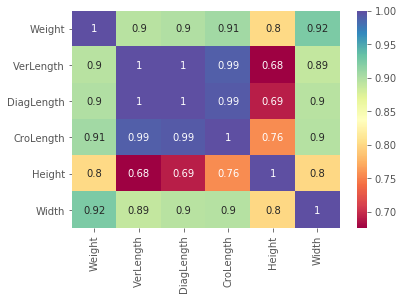

In [31]:
sns.heatmap(data.corr() , annot = True , cmap='Spectral')

# Separating dependant and independant columns



In [32]:
y=data['Weight']

In [33]:
X= data.iloc[:,2:7]


# Dividing dataset to train and test

In [34]:
from sklearn.model_selection import train_test_split


In [35]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state =4)

# linear regression

In [36]:
from sklearn.linear_model import LinearRegression


In [37]:
reg=LinearRegression()

# fit the model

In [38]:
reg.fit(X_train , y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Linear regression formula

In [39]:
print('Model coefficients: ', reg.coef_)

Model coefficients:  [110.84298004 -53.98708324 -35.22884297  36.05142681  44.43365094]


In [40]:
print("Model intercept at: ", reg.intercept_)

Model intercept at:  -410.1432919727653


# Predicting weight

In [41]:
y_pred=reg.predict(X_test)

# Accuracy 92.9%

In [42]:
reg.score(X_test , y_test)

0.9293332549407496

# 😢 اطفأني